In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/uber-ride-price-prediction/uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df=df.copy()
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year
0,24238194,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,2015
1,27835199,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,2009
2,44984355,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,2009
3,25894730,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,2009
4,17610152,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,2014


In [9]:
df=df.drop(['key'],axis=1)

In [10]:
df

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,year
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,2015
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,2009
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,2009
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,2009
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,6,10,2012
199996,16382965,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,4,3,2014
199997,27804658,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,0,6,2009
199998,20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,14,2,5,2015


In [13]:
df=df.drop(['Unnamed: 0'],axis=1)

In [14]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int32
day_of_week                        int32
month                              int32
year                               int32
dtype: object

In [15]:
valid_latitude_range = df['pickup_latitude'].between(-90, 90) & df['dropoff_latitude'].between(-90, 90)
valid_longitude_range = df['pickup_longitude'].between(-180, 180) & df['dropoff_longitude'].between(-180, 180)

In [16]:
df = df[valid_latitude_range & valid_longitude_range]

In [17]:
from geopy.distance import geodesic
df=df.copy()
def calculate_distance(row):
    return geodesic((row['pickup_latitude'],row['pickup_longitude']),
                   (row['dropoff_latitude'],row['dropoff_longitude'])).miles
df['distance']=df.apply(calculate_distance,axis=1)

In [18]:
print(df['fare_amount'].max())
print(df['fare_amount'].min())

499.0
-52.0


In [19]:
df=df[(df['fare_amount']>0)&(df['fare_amount']<500)]
print(df['fare_amount'].max())
print(df['fare_amount'].min())

499.0
0.01


In [20]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
print(df['passenger_count'].max())
print(df['passenger_count'].min())

6
1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [22]:
X=df[['distance','passenger_count','hour','day_of_week','month','year']]
y=df['fare_amount']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
dt_regressor=DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
y_pred=dt_regressor.predict(X_test)
print(y_pred)

[ 9.3 30.1 10.5 ... 12.5  4.5 10.5]


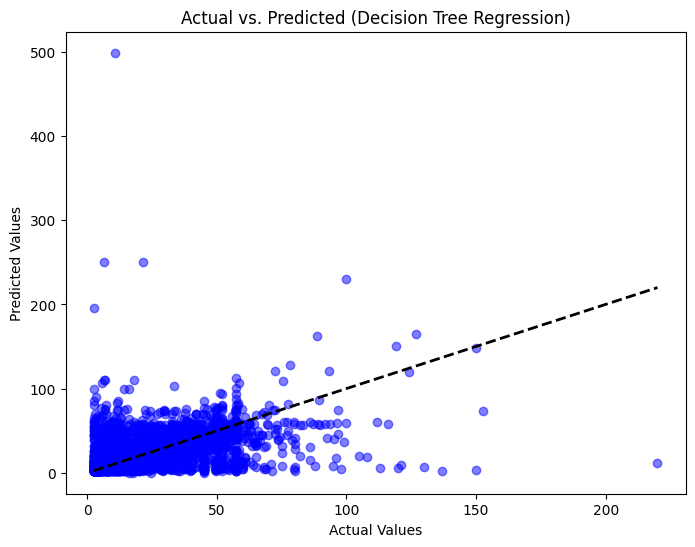

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted (Decision Tree Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [26]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [27]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2 Score): {r2:.2f}')

Mean Absolute Error (MAE): 3.23
Mean Squared Error (MSE): 55.73
Root Mean Squared Error (RMSE): 7.47
R-squared (R2 Score): 0.43
